# Principal Component Analysis
The goal of this question is to build a conceptual understanding of dimensionality reduction using PCA and implement it on a toy dataset. You’ll only have to use numpy and matplotlib for this question.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
# (a) Load data (features)
def load_data():
    
    data = np.load("features.npy")
    data = (data - np.mean(data))/np.std(data)
    
    return data

In [3]:
# (b) Perform eigen decomposition and return eigen pairs in desecending order of eigen values
def eigendecomp(X):
    
    # Calculate covariance
    covariance = (X.T.dot(X))/X.shape[0]

    # Eigen Decomposition 
    eig_vals, eig_vecs = np.linalg.eig(covariance)
    
    # Sort the eigen pairs in desecending order of eigen values
    index = np.argsort(eig_vals)
    sorted_eig_vals = eig_vals[index]
    sorted_eig_vals = sorted_eig_vals[::-1]
    sorted_eig_vecs = eig_vecs[:,index]
    sorted_eig_vecs = sorted_eig_vecs[:,::-1]
    
    return (sorted_eig_vals, sorted_eig_vecs)

In [4]:
# (c) Evaluate using variance_explained as the metric
def eval(X):
    
    # Reduce the dimensionality to k
    ve_list = []
    print("variance explained when reducing the dimensionality to k")
    for k in range(X.shape[0]):
        print(f"k = {k+1}")
        ve = X[0:k+1].sum()/X.sum()
        print(f"variance explained = {ve}")
        ve_list.append(ve)
    print("\n")
    
    # Compute the variance explained for each eigenvalue
    print("variance explained for each eigenvalue")
    for i in range(len(ve_list)):
        print(f"The {i+1}th eigenvalue: {X[i]}")
        if i == 0:
            print(f"variance explained = {ve_list[i]}")
        else:
            print(f"variance explained = {ve_list[i]-ve_list[i-1]}")

In [5]:
# (d) Visualize after projecting to 2-D space
def viz(X, sorted_eig_vecs):
    x_pca = np.dot(X, sorted_eig_vecs[:,0:2])
    y  = np.load("labels.npy", allow_pickle=True)
    labels = np.unique(y)
    plt.scatter(x_pca[(y == 0),0], x_pca[(y == 0), 1], c='red', label='Class 0')
    plt.scatter(x_pca[(y == 1),0], x_pca[(y == 1), 1], c='blue', label='Class 1')
    plt.scatter(x_pca[(y == 2),0], x_pca[(y == 2), 1], c='green', label='Class 2')
    plt.legend()
    plt.title("2-D dimensionality reduction with PCA")
    plt.xlabel("First Principal Component")
    plt.ylabel("Second Principal Component")

In [6]:
features = load_data()
print("Normalized Features shape: ", features.shape)


Normalized Features shape:  (150, 8)


In [7]:
sorted_eig_vals, sorted_eig_vecs = eigendecomp(features)

In [8]:
print("Sorted EigenValues: ", sorted_eig_vals)

Sorted EigenValues:  [5.13151080e+00 2.09783761e+00 6.99123742e-01 5.84243512e-02
 1.31034968e-02 1.72078267e-15 1.95426183e-16 1.38091055e-16]


In [9]:
eval(sorted_eig_vals)

variance explained when reducing the dimensionality to k
k = 1
variance explained = 0.6414388505934037
k = 2
variance explained = 0.9036685512903241
k = 3
variance explained = 0.991059018995762
k = 4
variance explained = 0.9983620628941539
k = 5
variance explained = 0.9999999999999998
k = 6
variance explained = 1.0
k = 7
variance explained = 1.0
k = 8
variance explained = 1.0


variance explained for each eigenvalue
The 1th eigenvalue: 5.131510804747234
variance explained = 0.6414388505934037
The 2th eigenvalue: 2.0978376055753647
variance explained = 0.2622297006969204
The 3th eigenvalue: 0.6991237416435045
variance explained = 0.0873904677054379
The 4th eigenvalue: 0.05842435118713472
variance explained = 0.00730304389839187
The 5th eigenvalue: 0.013103496846766986
variance explained = 0.0016379371058459213
The 6th eigenvalue: 1.7207826731306866e-15
variance explained = 2.220446049250313e-16
The 7th eigenvalue: 1.954261828767496e-16
variance explained = 0.0
The 8th eigenvalue: 1.3809

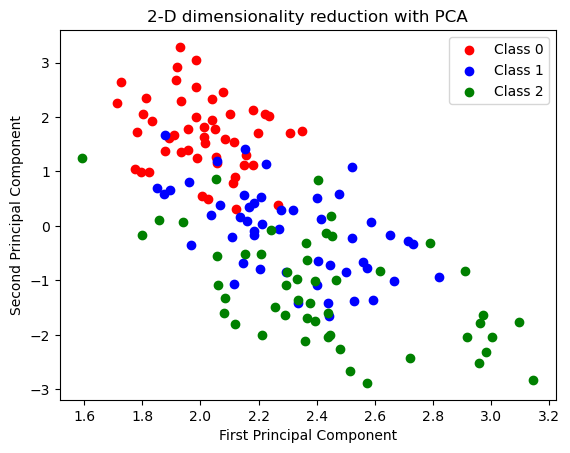

In [10]:
viz(features, sorted_eig_vecs)

In [11]:
# Creating sample data
import numpy as np
import matplotlib.pyplot as plt

def circle_points(r, n):
    for r, n in zip(r, n):
        t = np.linspace(0, 2*np.pi, n, endpoint=False)
        x = r * np.cos(t)
        y = r * np.sin(t)
        circles = (np.c_[x, y])
    return circles


In [12]:
r = [0.1]
n = [10]
circle = circle_points(r, n)


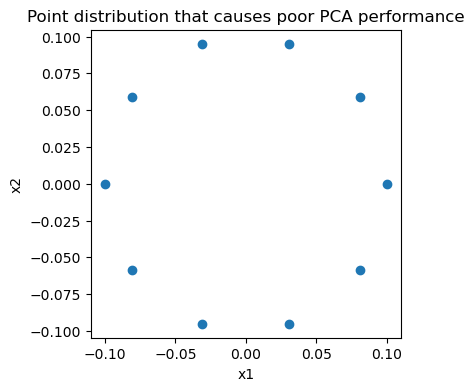

In [13]:
plt.figure(figsize = (4,4))
plt.scatter(circle[:,0], circle[:,1])
plt.xlabel("x1")
plt.ylabel("x2")
plt.title("Point distribution that causes poor PCA performance")
plt.show()

Data that has a distribution like above, that is without a specific direction, is not well suited for PCA since it doesn't really have a principal component.